In [63]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
# Load the data into a Pandas DataFrame
df_income_data = pd.read_csv(
    "Final_cma_level_df.csv",
    index_col="GEO_NAME")

# Display sample data
df_income_data.head(10)

,0 to 4 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,5 to 9 years,...,"$100,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","Under $10,000 (including loss)"
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
Abbotsford - Mission,10425.0,12225.0,11785.0,12395.0,12680.0,13690.0,14175.0,12885.0,12085.0,11910.0,...,24750.0,25155.0,20240.0,16665.0,13960.0,10920.0,8315.0,6145.0,4585.0,13830.0
Alma,1330.0,1775.0,1585.0,1390.0,1445.0,1510.0,1700.0,1910.0,1620.0,1540.0,...,3535.0,4050.0,3210.0,3280.0,2640.0,1690.0,1165.0,980.0,600.0,1570.0
Amos,955.0,1185.0,1045.0,990.0,1105.0,1110.0,1155.0,1255.0,1095.0,1145.0,...,2615.0,2210.0,1820.0,1900.0,1610.0,1205.0,915.0,710.0,485.0,955.0
Baie-Comeau,1085.0,1350.0,1235.0,1250.0,1255.0,1400.0,1455.0,1635.0,1595.0,1370.0,...,4625.0,3130.0,2775.0,2815.0,2350.0,1580.0,1165.0,1000.0,805.0,1295.0
Barrie,10830.0,13125.0,13070.0,13330.0,14160.0,14720.0,14455.0,13960.0,14110.0,12245.0,...,36705.0,25705.0,21540.0,18340.0,15045.0,12180.0,9645.0,7550.0,6170.0,13295.0
Bathurst,1035.0,1295.0,1350.0,1465.0,1445.0,1470.0,1475.0,1805.0,1905.0,1145.0,...,2425.0,5295.0,4205.0,3555.0,2295.0,1510.0,1145.0,870.0,530.0,2125.0
Belleville - Quinte West,5320.0,6075.0,5615.0,5755.0,6680.0,6905.0,6620.0,6345.0,6055.0,5870.0,...,13085.0,14515.0,12040.0,10995.0,8935.0,6680.0,5330.0,3385.0,2375.0,6070.0
Brandon,3160.0,3310.0,3340.0,4090.0,3880.0,4040.0,4015.0,3755.0,3300.0,3540.0,...,6205.0,6240.0,5715.0,5360.0,4315.0,3170.0,2315.0,1790.0,1460.0,3310.0
Brantford,7595.0,8695.0,8260.0,8300.0,9065.0,9325.0,9470.0,9040.0,8835.0,8380.0,...,19445.0,18070.0,15165.0,13270.0,11340.0,8780.0,6195.0,4685.0,3615.0,8300.0


In [65]:
# Generate summary statistics
df_income_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Abbotsford - Mission to Yorkton
Data columns (total 47 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   0 to 4 years                                                160 non-null    float64
 1   10 to 14 years                                              160 non-null    float64
 2   15 to 19 years                                              160 non-null    float64
 3   20 to 24 years                                              160 non-null    float64
 4   25 to 29 years                                              160 non-null    float64
 5   30 to 34 years                                              160 non-null    float64
 6   35 to 39 years                                              160 non-null    float64
 7   40 to 44 years                                              160 non-nul

In [66]:
for col in df_income_data.columns:
    df_income_data[col] = df_income_data[col].replace(',', '').astype(float) 

In [67]:
 df_income_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Abbotsford - Mission to Yorkton
Data columns (total 47 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   0 to 4 years                                                160 non-null    float64
 1   10 to 14 years                                              160 non-null    float64
 2   15 to 19 years                                              160 non-null    float64
 3   20 to 24 years                                              160 non-null    float64
 4   25 to 29 years                                              160 non-null    float64
 5   30 to 34 years                                              160 non-null    float64
 6   35 to 39 years                                              160 non-null    float64
 7   40 to 44 years                                              160 non-nul

In [68]:
# Plot your data to see what's in your DataFrame
df_income_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [GEO_NAME]   (value)

In [69]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
income_data_scaled = StandardScaler().fit_transform(
    df_income_data[['0 to 4 years', '10 to 14 years', '15 to 19 years',
       '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
       '40 to 44 years', '45 to 49 years', '5 to 9 years', '50 to 54 years',
       '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years',
        '75 to 79 years', '80 to 84 years', '85 years and over', 'High (secondary) school diploma or equivalency certificate',
        'No certificate, diploma or degree', 'Postsecondary certificate, diploma or degree', 'Immigrants',
        'Non-immigrants', 'Non-permanent residents', 'Married or living common-law', 'Not married and not living common-law',
        'With children', 'Without children', 'Apartment in a building that has fewer than five storeys', 
        'Apartment in a building that has five or more storeys', 'Apartment or flat in a duplex',
        'Movable dwelling', 'Other single-attached house', 'Row house', 'Semi-detached house', 'Single-detached house',
       '$10,000 to $19,999', '$100,000 and over', '$20,000 to $29,999', '$30,000 to $39,999',
       '$40,000 to $49,999', '$50,000 to $59,999',
       '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999',
       '$90,000 to $99,999', 'Under $10,000 (including loss)' ]])

In [70]:
# Create a DataFrame with the scaled data
income_data_scaled = pd.DataFrame(income_data_scaled, columns = ['0 to 4 years', '10 to 14 years', '15 to 19 years',
       '20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
       '40 to 44 years', '45 to 49 years', '5 to 9 years', '50 to 54 years',
       '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years',
        '75 to 79 years', '80 to 84 years', '85 years and over', 'High (secondary) school diploma or equivalency certificate',
        'No certificate, diploma or degree', 'Postsecondary certificate, diploma or degree', 'Immigrants',
        'Non-immigrants', 'Non-permanent residents', 'Married or living common-law', 'Not married and not living common-law',
        'With children', 'Without children', 'Apartment in a building that has fewer than five storeys', 
        'Apartment in a building that has five or more storeys', 'Apartment or flat in a duplex',
        'Movable dwelling', 'Other single-attached house', 'Row house', 'Semi-detached house', 'Single-detached house',
       '$10,000 to $19,999', '$100,000 and over', '$20,000 to $29,999', '$30,000 to $39,999',
       '$40,000 to $49,999', '$50,000 to $59,999',
       '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999',
       '$90,000 to $99,999', 'Under $10,000 (including loss)' ])

# Copy the crypto names from the original data
income_data_scaled["GEO_NAME"] = df_income_data.index
# Set the coinid column as index
income_data_scaled = income_data_scaled.set_index("GEO_NAME")

# Display sample data
income_data_scaled.sample(10)

,0 to 4 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,5 to 9 years,...,"$100,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","Under $10,000 (including loss)"
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
Wasaga Beach,-0.287038,-0.280882,-0.276941,-0.274330,-0.268284,-0.272639,-0.274980,-0.273987,-0.269003,-0.287744,...,-0.261038,-0.252019,-0.267329,-0.278813,-0.286137,-0.288093,-0.285626,-0.282468,-0.281487,-0.249861
Nanaimo,-0.168130,-0.148947,-0.156407,-0.148335,-0.146061,-0.144517,-0.139601,-0.149425,-0.145785,-0.156571,...,-0.161929,-0.116323,-0.107157,-0.112671,-0.126516,-0.136666,-0.143878,-0.146710,-0.155113,-0.128847
Pembroke,-0.277482,-0.277567,-0.271382,-0.266644,-0.259435,-0.265350,-0.270235,-0.272437,-0.267400,-0.281478,...,-0.261992,-0.262323,-0.275660,-0.286440,-0.285353,-0.285820,-0.284547,-0.282246,-0.281487,-0.251627
Hawkesbury (Ontario part),-0.303645,-0.297590,-0.291448,-0.286673,-0.279111,-0.285779,-0.290795,-0.290042,-0.283432,-0.303340,...,-0.279075,-0.277085,-0.295701,-0.307116,-0.311453,-0.313804,-0.309731,-0.306544,-0.305129,-0.267520
Thompson,-0.279832,-0.279689,-0.279110,-0.274213,-0.267868,-0.272741,-0.281517,-0.279966,-0.278851,-0.282592,...,-0.260085,-0.286786,-0.300731,-0.308586,-0.310557,-0.309827,-0.306853,-0.298073,-0.291338,-0.259313
London,0.532788,0.537782,0.536421,0.563035,0.542300,0.475866,0.462960,0.440613,0.442133,0.541344,...,0.325876,0.507683,0.567640,0.596741,0.602703,0.568478,0.515936,0.426862,0.401042,0.444542
Granby,-0.182073,-0.171356,-0.180677,-0.203414,-0.195929,-0.193897,-0.190210,-0.172455,-0.179681,-0.174813,...,-0.211159,-0.146331,-0.154391,-0.144925,-0.151943,-0.168912,-0.183632,-0.194861,-0.212812,-0.190341
Salmon Arm,-0.290485,-0.280219,-0.274771,-0.278755,-0.272969,-0.275000,-0.279408,-0.276091,-0.273812,-0.287048,...,-0.265271,-0.267324,-0.281554,-0.291494,-0.295659,-0.297326,-0.292822,-0.289379,-0.288242,-0.254431
Campbell River,-0.261659,-0.251711,-0.248875,-0.255233,-0.248920,-0.247486,-0.248938,-0.245532,-0.244840,-0.256970,...,-0.239645,-0.235449,-0.240608,-0.250878,-0.257013,-0.263944,-0.255586,-0.257724,-0.254467,-0.228982


In [71]:
#income_data_scaled.to_csv('Scaled_data.csv', index=True)

In [72]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [73]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(income_data_scaled)
    inertia.append(model.inertia_)

C:\Users\riley\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head()

,k,inertia
0,1,7520.000000
1,2,1980.681500
2,3,981.776689
3,4,607.521416
4,5,385.046650


<AxesSubplot:xlabel='k'>

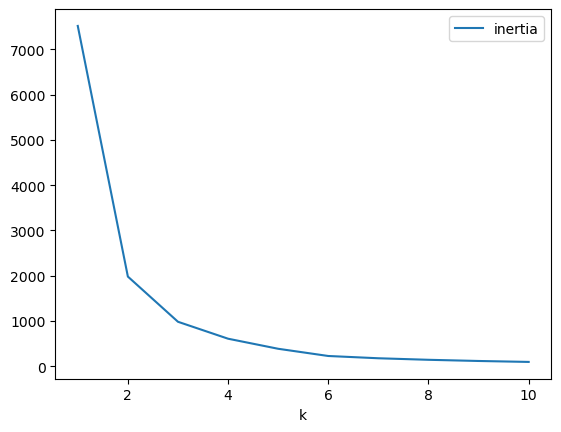

In [75]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k", "inertia")

In [76]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=6, random_state=42)

In [77]:
# Fit the K-Means model using the scaled data
model.fit(income_data_scaled)

KMeans(n_clusters=6, random_state=42)

In [78]:
# Predict the clusters to group the cryptocurrencies using the scaled data
income_data_scaled_pred_df = model.predict(income_data_scaled)

# Print the resulting array of cluster values.
k3_pred = income_data_scaled_pred_df

In [79]:
# Create a copy of the DataFrame
income_k3_df = income_data_scaled.copy()

In [80]:
# Add a new column to the DataFrame with the predicted clusters
income_k3_df['k3_seg'] = k3_pred

# Display sample data
income_k3_df.sample(50)

,0 to 4 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,5 to 9 years,...,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","Under $10,000 (including loss)",k3_seg
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
Okotoks,-0.262442,-0.238053,-0.236130,-0.261055,-0.265889,-0.261551,-0.255580,-0.246750,-0.241405,-0.252514,...,-0.265998,-0.278961,-0.289105,-0.288378,-0.283832,-0.277891,-0.268202,-0.258126,-0.236565,0
Campbellton,-0.299728,-0.294275,-0.286838,-0.282481,-0.276613,-0.281365,-0.286894,-0.286056,-0.278851,-0.300137,...,-0.272446,-0.285327,-0.299121,-0.308652,-0.311816,-0.309371,-0.302085,-0.302596,-0.260456,0
Lethbridge,-0.080711,-0.095377,-0.103530,-0.080214,-0.104522,-0.113411,-0.120307,-0.128831,-0.137998,-0.091264,...,-0.107225,-0.123112,-0.131325,-0.130324,-0.123881,-0.119234,-0.133558,-0.127812,-0.136430,0
Ingersoll,-0.289388,-0.285523,-0.282499,-0.278289,-0.272761,-0.276437,-0.280146,-0.281738,-0.276675,-0.292200,...,-0.282207,-0.294837,-0.300500,-0.300587,-0.302440,-0.296599,-0.293837,-0.293026,-0.262637,0
Prince Albert,-0.220456,-0.220682,-0.219182,-0.224840,-0.223101,-0.230342,-0.237023,-0.239110,-0.239229,-0.227310,...,-0.238883,-0.248231,-0.256575,-0.256677,-0.263234,-0.259543,-0.252374,-0.242083,-0.222022,0
Wetaskiwin,-0.291895,-0.288971,-0.282635,-0.279454,-0.276717,-0.279414,-0.284469,-0.282624,-0.279767,-0.292200,...,-0.277206,-0.295858,-0.305646,-0.308540,-0.306986,-0.303975,-0.299410,-0.298656,-0.264611,0
St. Catharines - Niagara,0.298575,0.275767,0.309591,0.284845,0.259543,0.242106,0.222041,0.231238,0.275858,0.275100,...,0.432665,0.525200,0.459637,0.400180,0.346736,0.287304,0.227349,0.247367,0.256736,4
Lacombe,-0.290642,-0.283932,-0.279923,-0.278056,-0.275051,-0.277156,-0.280990,-0.281074,-0.278393,-0.289136,...,-0.280640,-0.297194,-0.307484,-0.307644,-0.305565,-0.300197,-0.294952,-0.291338,-0.261079,0
Campbellton (Quebec part),-0.312731,-0.307932,-0.302159,-0.294824,-0.288897,-0.293581,-0.299125,-0.298236,-0.294540,-0.312112,...,-0.296849,-0.313542,-0.323932,-0.325567,-0.325879,-0.321963,-0.314346,-0.312447,-0.276764,0


In [130]:
pca = PCA(n_components=6)
income_pca_data = pca.fit_transform(income_data_scaled)
pca.explained_variance_ratio_

array([0.94517169, 0.02672395, 0.01500112, 0.00683889, 0.00351469,
       0.0012598 ])

In [82]:
pca_income_df = pd.DataFrame(income_pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_income_df["GEO_NAME"] = income_data_scaled.index
pca_income_df = pca_income_df.set_index("GEO_NAME")
pca_income_df.head()

,PC1,PC2,PC3
GEO_NAME,,,
Abbotsford - Mission,-0.119676,-0.009200,0.273978
Alma,-1.749571,-0.223052,0.459783
Amos,-1.895563,-0.295146,0.377120
Baie-Comeau,-1.734016,0.387397,-0.531302
Barrie,-0.024744,-0.403558,0.292323


In [83]:
import numpy as np
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = income_data_scaled.columns[feature_idx]  # Assuming you have column names
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is 60 to 64 years
Component 2: Most important feature is Movable dwelling
Component 3: Most important feature is Movable dwelling


In [132]:
#Now, using the important features determined by the PCA components, let's use them to graph the original scaled dataframe,
#and compare it to the others.

import hvplot.pandas

scatter = income_k3_df.hvplot.scatter(
    x="60 to 64 years",
    y="$100,000 and over",
    c="k3_seg",
    cmap='viridis',
    hover_cols=["GEO_NAME"],
    #title="Average income and Married/Common-law",
    xlabel="60 to 64 years",
    ylabel="$100,000 and over"
)
scatter

:Scatter   [60 to 64 years]   ($100,000 and over,k3_seg,GEO_NAME)

In [85]:
#Use ONLY when saving previous plot
hvplot.save(scatter, 'Average_Married.html')

In [86]:
k = list(range(1, 11))
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(pca_income_df)
    inertia.append(model.inertia_)

C:\Users\riley\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [88]:
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_plot_pca

:Curve   [k]   (inertia)

In [89]:
model = KMeans(n_clusters=4, random_state=42)

In [90]:
model.fit(pca_income_df)

KMeans(n_clusters=4, random_state=42)

In [91]:
k_predict_pca = model.predict(pca_income_df)
k_predict_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0])

In [92]:
pca_income_pred_df = pca_income_df.copy()
#pca_income_df.to_csv('PCA_Data_df.csv', index=True)
# Add a new column to the DataFrame with the predicted clusters
pca_income_pred_df['Clusters'] = k_predict_pca

# Display sample data
pca_income_pred_df.head()

,PC1,PC2,PC3,Clusters
GEO_NAME,,,,
Abbotsford - Mission,-0.119676,-0.009200,0.273978,0
Alma,-1.749571,-0.223052,0.459783,0
Amos,-1.895563,-0.295146,0.377120,0
Baie-Comeau,-1.734016,0.387397,-0.531302,0
Barrie,-0.024744,-0.403558,0.292323,0


In [93]:
pca_pred_scatter = pca_income_pred_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Clusters',
    title="PCA Plot",
    hover_cols=['GEO_NAME'],
)
pca_pred_scatter

C:\Users\riley\anaconda3\lib\site-packages\holoviews\core\data\pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [Clusters]
   :Scatter   [PC1]   (PC2,GEO_NAME)

In [94]:
hvplot.save(pca_pred_scatter, 'PCA_Plot.html')